In [1]:
import numpy as np
import soundfile as sf
%matplotlib inline
from matplotlib import pyplot as plt
from IPython.display import Audio
from librosa.feature import melspectrogram
from librosa.display import specshow
import librosa
import scipy

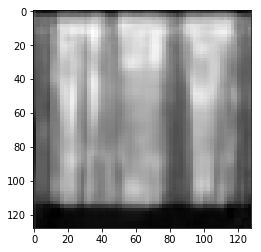

In [10]:
spec = scipy.misc.imread('out/sp01.png')[:,:,0]
plt.imshow(spec, cmap='gray')

(129, 129)


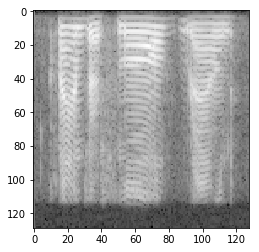

In [26]:
audio, sr = sf.read('data/audio/clean/sp21.wav')
audio=audio[:16384]
freqs, bins, Sxx = scipy.signal.stft(audio, nfft=256, fs=sr, noverlap=128)
angle = np.angle(Sxx)
Sxx = np.abs(Sxx)
print(Sxx.shape)
plt.imshow(np.log(Sxx[:,:-1]), cmap='gray')

In [27]:
t, x = scipy.signal.istft(Sxx * np.exp(1j * angle), fs=sr, nfft=256, noverlap=128)
Audio(x, rate=sr)

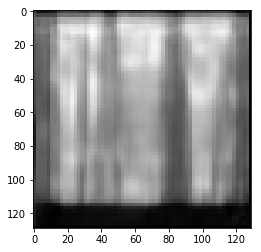

In [48]:
s = spec/255
s = np.vstack((s, np.zeros(128)))
s = np.hstack((s, np.zeros((129,1))))
plt.imshow(s, cmap='gray')

In [49]:
t, x = scipy.signal.istft(s * np.exp(1j * angle), fs=sr, nfft=256, noverlap=128)
Audio(x, rate=sr)